In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

Adapted from http://kitchingroup.cheme.cmu.edu/pycse/pycse.html#sec-10-4

## Plane Poiseuille flow - BVP solve by shooting method

One approach to solving BVPs is to use the shooting method. The reason we cannot use an initial value solver for a BVP is that there is not enough information at the initial value to start. In the shooting method, we take the function value at the initial point, and guess what the function derivatives are so that we can do an integration. If our guess was good, then the solution will go through the known second boundary point. If not, we guess again, until we get the answer we need. In this example we repeat the pressure driven flow example, but illustrate the shooting method.

In the pressure driven flow of a fluid with viscosity $\mu$ between two stationary plates separated by distance $d$ and driven by a pressure drop $\Delta P/\Delta x$, the governing equations on the velocity $u$ of the fluid are (assuming flow in the x-direction with the velocity varying only in the y-direction):

$$\frac{\Delta P}{\Delta x} = \mu \frac{d^2u}{dy^2}$$

with boundary conditions $u(y=0) = 0$ and $u(y=d) = 0$, i.e. the no-slip condition at the edges of the plate.

we convert this second order BVP to a system of ODEs by letting $u_1 = u$, $u_2 = u_1'$ and then $u_2' = u_1''$. This leads to:

$\frac{d u_1}{dy} = u_2$

$\frac{d u_2}{dy} = \frac{1}{\mu}\frac{\Delta P}{\Delta x}$

with boundary conditions $u_1(y=0) = 0$ and $u_1(y=d) = 0$.

for this problem we let the plate separation be d=0.1, the viscosity $\mu = 1$, and $\frac{\Delta P}{\Delta x} = -100$.

## Shooting method
To integrate the differential equations we need starting values $u_1(0)$ and $u_2(0)$, but we only have $u_1(0)=0$. We need to guess a value for $u_2(0)$ and see if the solution goes through the $u_2(d)=0$ boundary value.



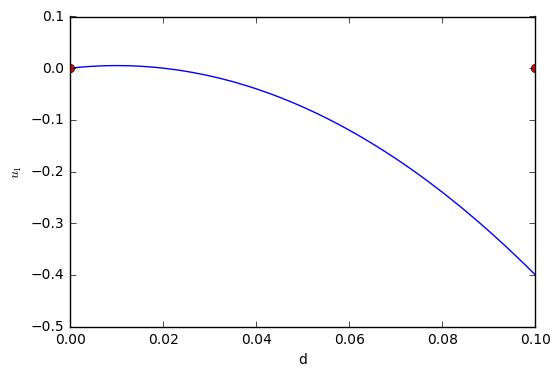

In [2]:
from scipy.integrate import odeint

d = 0.1 # plate thickness
mu = 1
Pdrop = -100

def odefun(U, y):
    u1, u2 = U
    du1dy = u2
    du2dy = 1.0 / mu * Pdrop
    return [du1dy, du2dy]

u1_0 = 0 # known
u2_0 = 1 # guessed

dspan = np.linspace(0, d)

U = odeint(odefun, [u1_0, u2_0], dspan)

def plot_results(dspan, U):
    plt.plot(dspan, U[:,0], label="Shooting method")
    plt.plot([0,d],[0,0], 'ro') # the boundary values as red circles
    plt.xlim(0,d)
    plt.xlabel('d')
    plt.ylabel('$u_1$')

plot_results(dspan, U)

Too low! Guess higher

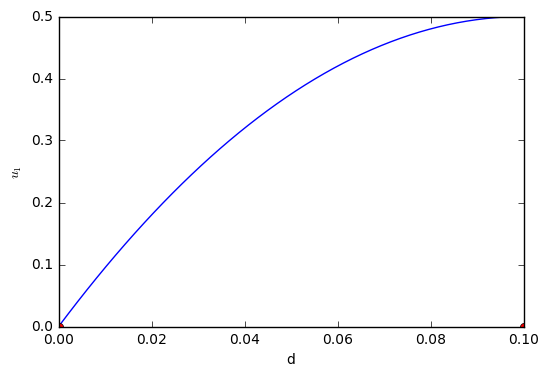

In [3]:
u1_0 = 0 # known
u2_0 = 10 # guessed higher than last time

U = odeint(odefun, [u1_0, u2_0], dspan)

plot_results(dspan, U)

Rather than keep guessing, let's use a nonlinear solver to converge upon the best value for `u2_0`

Optimized u2 is 5.000000000061994


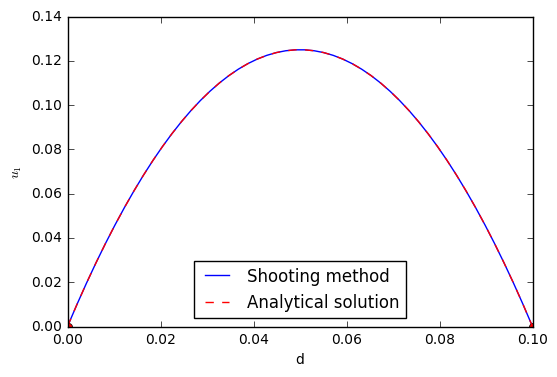

In [4]:
from scipy.optimize import fsolve

u1_0 = 0 # known

def objective(u2_0):
    U = odeint(odefun, [u1_0, u2_0], dspan)
    u1 = U[:,0]
    return u1[-1]

u2_0, = fsolve(objective, 1.0)
print("Optimized u2 is {}".format(u2_0))

# now solve with optimal u2_0
U = odeint(odefun, [u1_0, u2_0], dspan)

plot_results(dspan, U)

# Also plot an analytical solution
u = -(Pdrop) * d**2 / 2 / mu * (dspan / d - (dspan / d)**2)
plt.plot(dspan, u, 'r--', label='Analytical solution')
plt.legend(loc='best')

plt.show()